# 1. **Importing & Loading**

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tabulate import tabulate
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")

Libraries imported successfully!


In [1]:
# Load the dataset
df = pd.read_csv('olist_orders_merged.csv')

NameError: name 'pd' is not defined

# 2. **Quality Checks**

## 2.1 Viewing

In [ ]:
def show_unique_values(df):

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Get unique values for the column
        unique_values = df[column].unique()

        # Create a list to store the results
        results = []

        # Append the column name and its unique values to the results list
        results.append([column, ", ".join(map(str, unique_values))])

        # Print the results in a table format
        print(tabulate(results, headers=["Column", "Unique Values"], tablefmt="pretty"))

In [ ]:
show_unique_values(Employee_df)

+------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
show_unique_values(PerformanceRating_df)

+---------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2.2 Missing Values & Data Types

In [ ]:
# Check missing values
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [ ]:
# Check zeros in numeric columns
(Employee_df[["YearsWithCurrManager", "Salary", "Age","DistanceFromHome (KM)"]] == 0).sum()

,0
YearsWithCurrManager,479
Salary,0
Age,0
DistanceFromHome (KM),0


In [ ]:
# Check missing values
PerformanceRating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


## 2.3 Descriptive Statistics

In [ ]:
Employee_df.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
PerformanceRating_df.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


## 2.3 Duplicates

In [ ]:
# Employee duplicates
Employee_df["EmployeeID"].duplicated().sum()

0

In [ ]:
# Performance duplicates
PerformanceRating_df["PerformanceID"].duplicated().sum()

0

## 2.4 Orphaned Data

In [ ]:
# Checks for any unmatched IDs in PerformaneRating
PerformanceRating_df[~PerformanceRating_df["EmployeeID"].isin(Employee_df["EmployeeID"])]

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating


# 3. **EDA**

## 3.1 Outliers

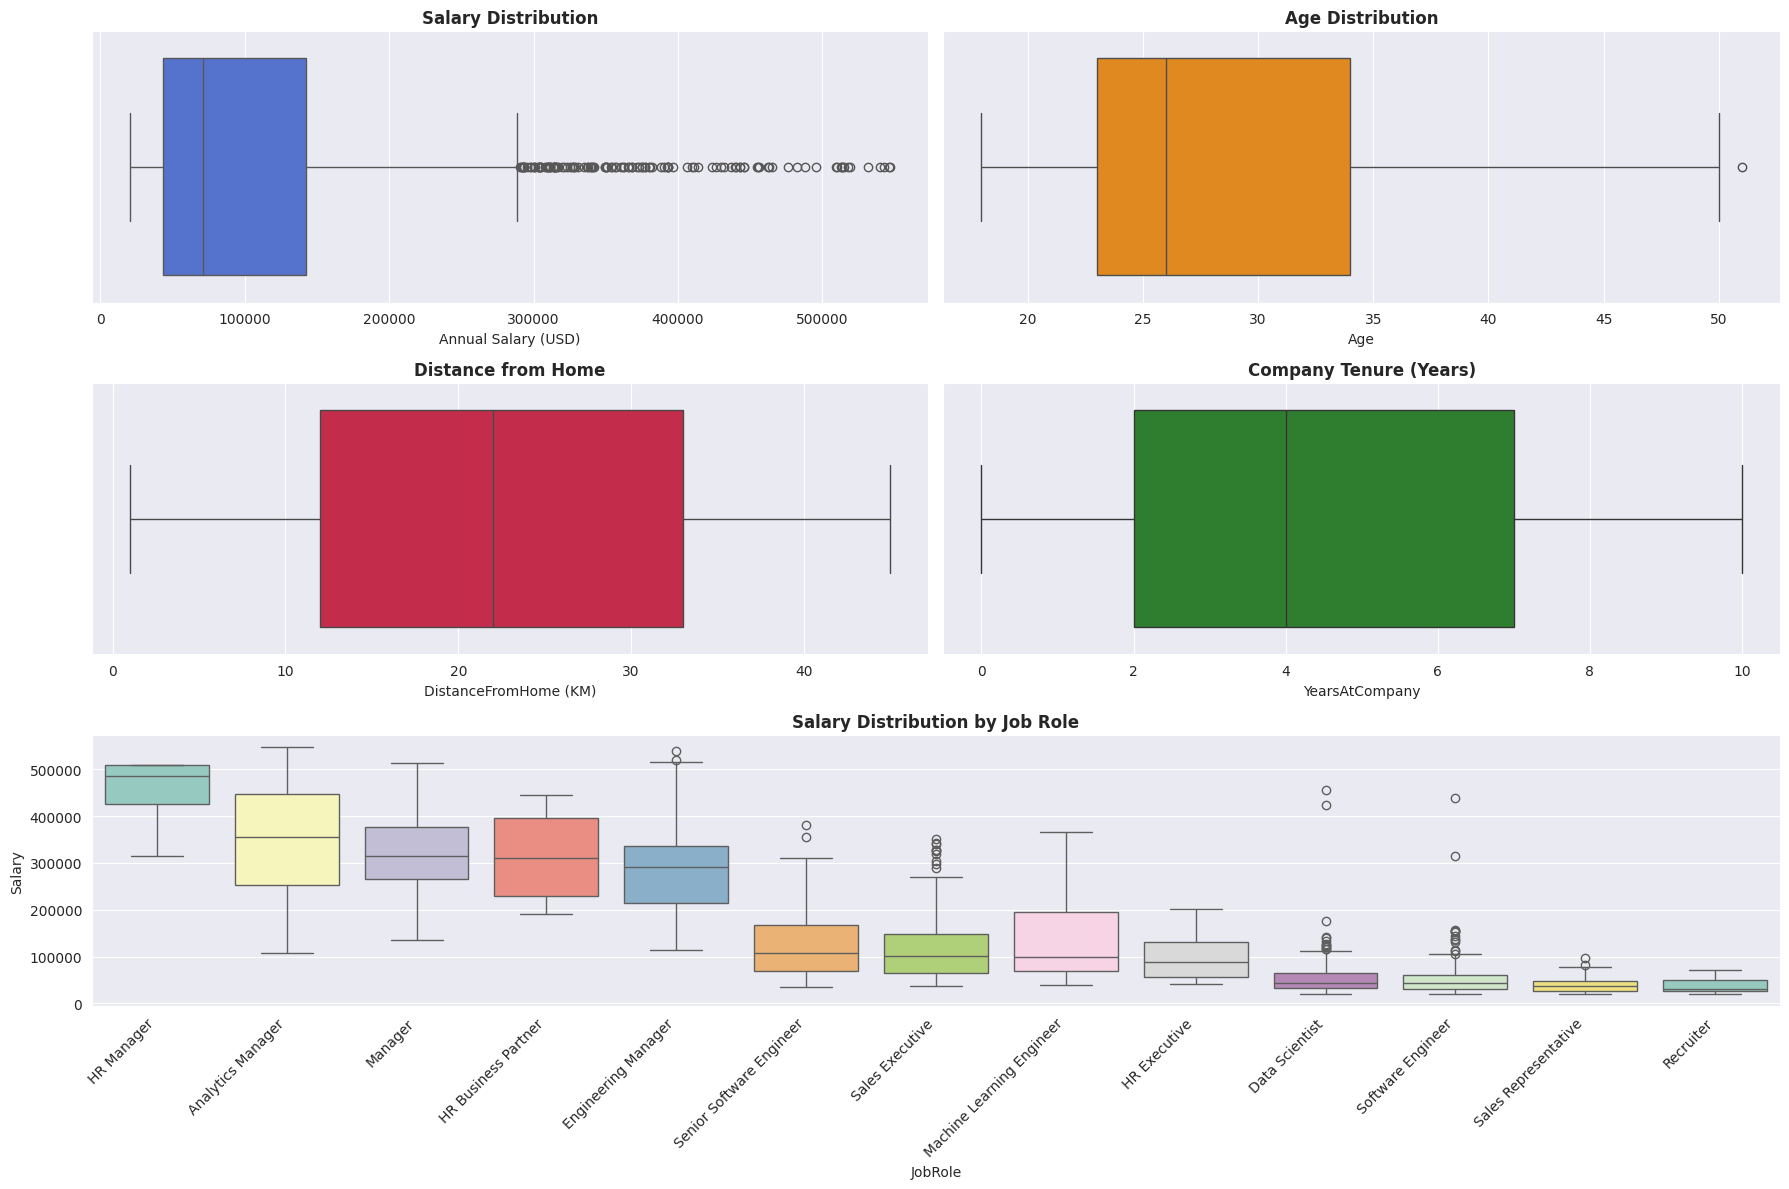


Salary outliers (124 cases):
   EmployeeID  Salary
2   95D7-1CE9  309964
3   47A0-559B  293132
12  8BAB-B4A6  340229
15  5C03-1009  316208
24  469A-8121  328415

Age outliers (1 cases):
     EmployeeID  Age
1185  08AC-30AB   51

YearsAtCompany outliers (0 cases):
Empty DataFrame
Columns: [EmployeeID, YearsAtCompany]
Index: []

DistanceFromHome (KM) outliers (0 cases):
Empty DataFrame
Columns: [EmployeeID, DistanceFromHome (KM)]
Index: []


In [ ]:
# Initialize style
sns.set_style("darkgrid")
plt.rcParams['figure.dpi'] = 100


def plot_outliers():
    """Visualize outliers in key numerical features"""
    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(3, 2)

    # Salary Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    sns.boxplot(x=Employee_df['Salary'], color='royalblue')
    ax1.set_title('Salary Distribution', weight='bold')
    ax1.set_xlabel('Annual Salary (USD)')

    # Age Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(x=Employee_df['Age'], color='darkorange')
    ax2.set_title('Age Distribution', weight='bold')

    # Tenure Analysis
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(x=Employee_df['YearsAtCompany'], color='forestgreen')
    ax3.set_title('Company Tenure (Years)', weight='bold')

    # Distance from Home
    ax4 = fig.add_subplot(gs[1, 0])
    sns.boxplot(x=Employee_df['DistanceFromHome (KM)'], color='crimson')
    ax4.set_title('Distance from Home', weight='bold')

    # Salary vs Job Role
    ax7 = fig.add_subplot(gs[2, :])
    sorted_roles = Employee_df.groupby('JobRole')['Salary'].median().sort_values(ascending=False).index
    sns.boxplot(x='JobRole', y='Salary', data=Employee_df, order=sorted_roles, palette='Set3')
    ax7.set_title('Salary Distribution by Job Role', weight='bold')
    ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Run the function
plot_outliers()

# Additional Outlier Checks
def numerical_outlier_analysis(df, columns):
    """Statistical outlier detection"""
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n{col} outliers ({len(outliers)} cases):")
        print(outliers[['EmployeeID', col]].head())

# Analyze key numerical columns
numerical_columns = ['Salary', 'Age', 'YearsAtCompany', 'DistanceFromHome (KM)']
numerical_outlier_analysis(Employee_df, numerical_columns)

## 3.2 Exploratoin

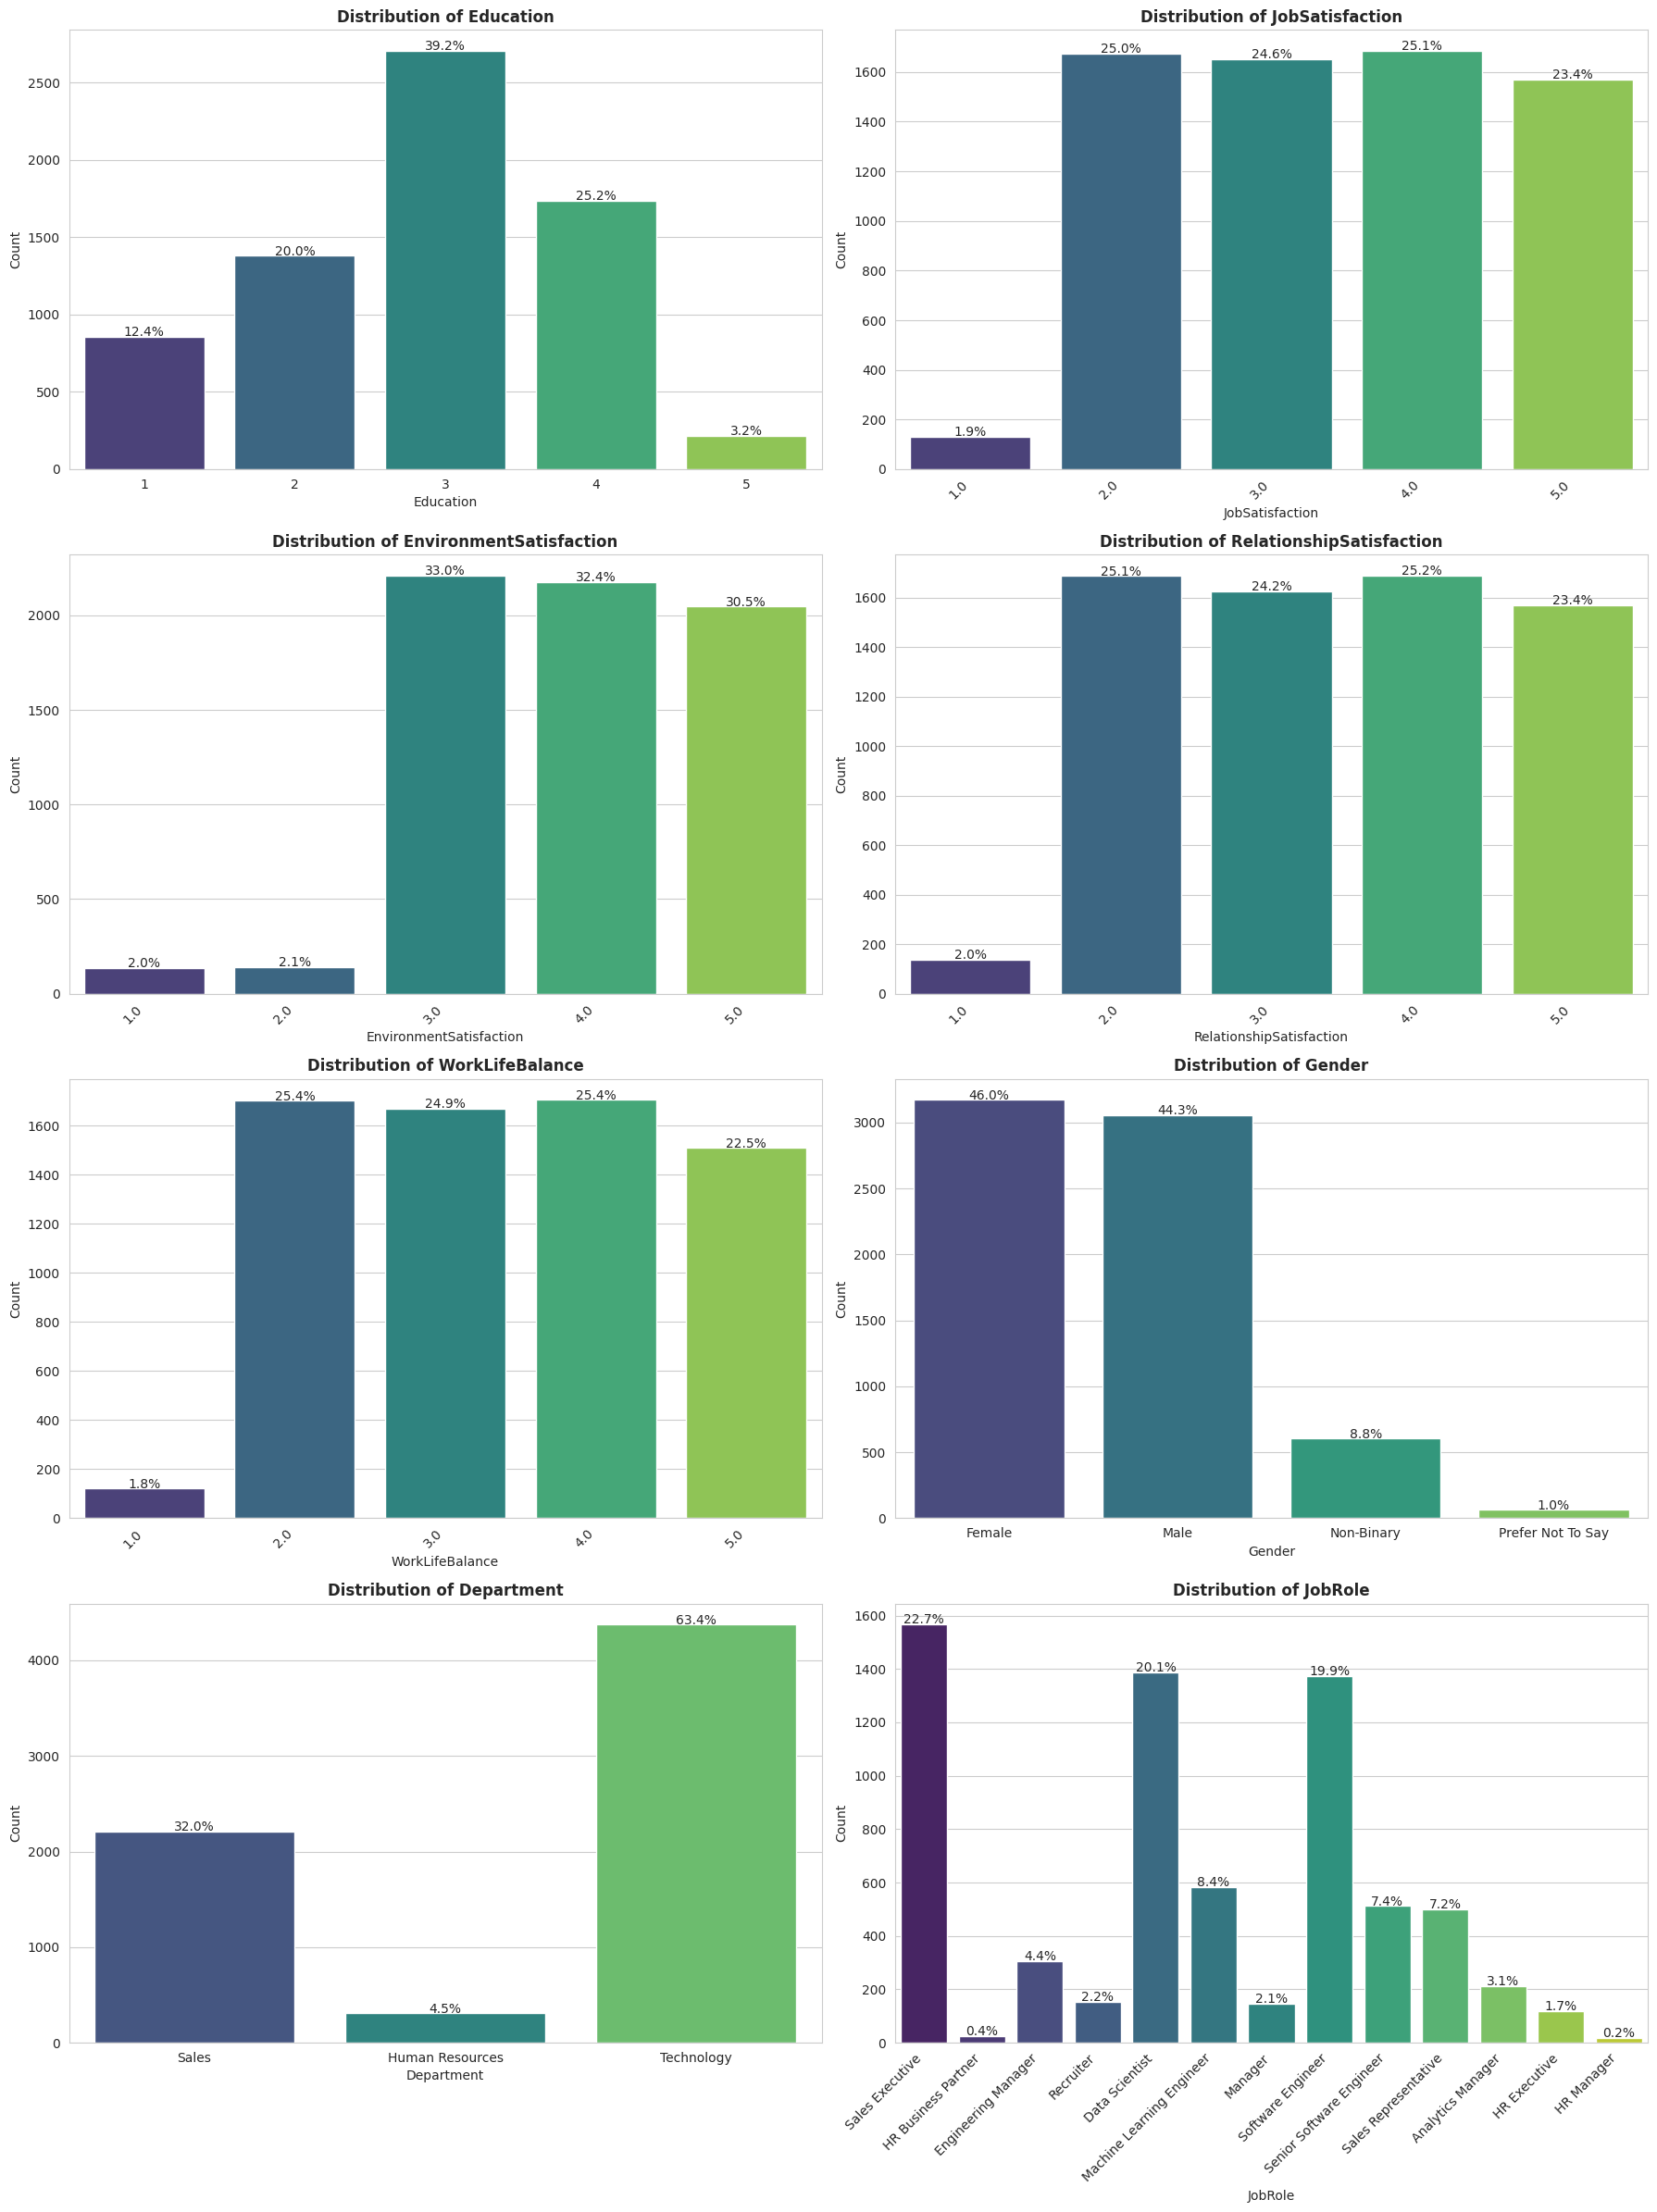

In [ ]:
# Merge data for analysis
merged_df = pd.merge(Employee_df, PerformanceRating_df, on="EmployeeID", how="left")

# Define columns to visualize
categorical_columns = [
    "Education", "JobSatisfaction", "EnvironmentSatisfaction",
    "RelationshipSatisfaction", "WorkLifeBalance", "Gender",
    "Department", "JobRole"
]
def plot_countplots(df, columns):
    # Initialize style
    sns.set_style("whitegrid")
    plt.rcParams['figure.dpi'] = 100

    """Create countplots for categorical columns"""
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(18, 6 * ((num_plots + 1) // 2)))
    axes = axes.flatten()  # Flatten for easy iteration

    for i, col in enumerate(columns):
        # Create countplot
        sns.countplot(x=col, data=df, palette="viridis", ax=axes[i])
        axes[i].set_title(f"Distribution of {col}", weight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

        # Add percentage annotations
        total = len(df[col].dropna())
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].text(
                p.get_x() + p.get_width() / 2., height + 3,
                f"{height/total:.1%}", ha="center"
            )

        # Rotate x-labels if needed
        if len(df[col].unique()) > 5:
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Run the function
plot_countplots(merged_df, categorical_columns)

# 4. **Cleaning**

## 4.1 Dropping Columns

In [ ]:
# Columns irrelevant to analysis (e.g., names, redundant IDs)
Employee_df.drop(["FirstName", "LastName", "State"], axis=1, inplace=True)

## 4.2 Fixing a Typo

In [ ]:
Employee_df["BusinessTravel"] = Employee_df["BusinessTravel"].str.strip()  # Remove trailing spaces

## 4.2 Aligning Dates

In [ ]:
# Convert ReviewDate and HireDate to US format
Employee_df["HireDate"] = pd.to_datetime(Employee_df["HireDate"]).dt.strftime('%m/%d/%Y')
PerformanceRating_df["ReviewDate"] = pd.to_datetime(PerformanceRating_df["ReviewDate"]).dt.strftime('%m/%d/%Y')

## 4.3 Validation

In [ ]:
Employee_df

,EmployeeID,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Female,30,Some Travel,Sales,27,White,5,Marketing,Sales Executive,Divorced,102059,1,No,01/03/2012,No,10,4,9,7
1,CBCB-9C9D,Male,38,Some Travel,Sales,23,White,4,Marketing,Sales Executive,Single,157718,0,Yes,01/04/2012,No,10,6,10,0
2,95D7-1CE9,Male,43,Some Travel,Human Resources,29,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,01/04/2012,No,10,6,10,8
3,47A0-559B,Non-Binary,39,Some Travel,Technology,12,White,3,Computer Science,Engineering Manager,Married,293132,0,No,01/05/2012,No,10,10,10,0
4,42CC-040A,Female,29,Some Travel,Human Resources,29,White,2,Technical Degree,Recruiter,Single,49606,0,No,01/05/2012,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Male,20,Some Travel,Technology,28,Black or African American,2,Computer Science,Software Engineer,Single,38508,0,No,12/26/2022,No,0,0,0,0
1466,6FB9-A624,Non-Binary,27,Some Travel,Technology,8,Black or African American,3,Business Studies,Senior Software Engineer,Single,92995,3,No,12/30/2022,No,0,0,0,0
1467,EBF4-5928,Male,21,Some Travel,Sales,4,Black or African American,4,Marketing,Sales Executive,Single,63375,0,No,12/30/2022,No,0,0,0,0
1468,60E6-B1D9,Male,21,Some Travel,Technology,7,Black or African American,3,Information Systems,Data Scientist,Married,46521,0,No,12/30/2022,No,0,0,0,0


In [ ]:
PerformanceRating_df

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,01/02/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,01/03/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,01/03/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,01/04/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,01/04/2013,5,2,3,1,0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...
6704,PR995,4F28-CFAF,03/14/2016,5,3,3,3,1,5,5,4
6705,PR996,7C80-94E0,03/14/2016,3,5,4,2,1,3,4,4
6706,PR997,8233-2483,03/14/2016,3,4,2,3,1,2,3,2
6707,PR998,8A5B-3D6E,03/15/2016,5,2,5,2,2,4,3,3


## 4.4 Saving

In [ ]:
# Save cleaned data
Employee_df.to_csv("Employee_Cleaned.csv", index=False)
PerformanceRating_df.to_csv("Performance_Cleaned.csv", index=False)

# 5. Forecasting

## 5.2 Correlation

In [ ]:
for index, row in Employee_df.iterrows():
    if row['Attrition'] == 'Yes':
        Employee_df.loc[index, 'Attrition_group'] = 1
    else:
        Employee_df.loc[index, 'Attrition_group'] = 0

Employee_df['Attrition_group'] = Employee_df['Attrition_group'].astype('int')

In [ ]:
Employee_df.drop(["EmployeeID", "HireDate", "Attrition", "OverTime", "MaritalStatus", "EducationField", "JobRole", "Ethnicity", "Department", "Gender", "BusinessTravel", "Gender"], axis=1, inplace=True)

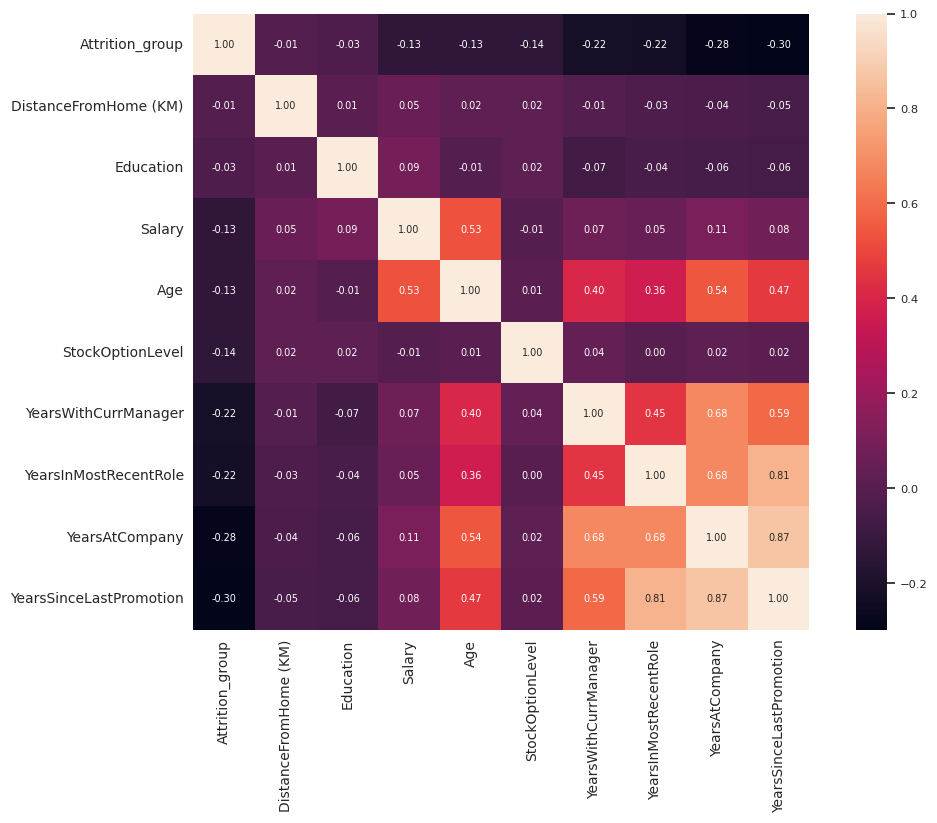

In [ ]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(12, 8))
corrmat = Employee_df.corr()
k = 27 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition_group')['Attrition_group'].index
cm = np.corrcoef(Employee_df[cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()